# Data

Data (present in data folder in the directory) is provided by SocialBuzz in three csv files as:

   - "Content.csv" - Description about Content (Content ID, Type, Links etc)
   - "Reactions.csv" - Description about Reactions to different Content (Content ID, User ID, Reaction Type, Time of Reaction etc)
   - "ReactionTypes" - Description about each Reaction with assigned Sentiment and Score to it.

"Preprocessed_data.csv" is final dataframe created by cleaning and joining all three tables together, This cleaned data is used for analysis in section 3 of Notebook

# Notebook Structure

## Section 1. Addressing Data Quality

   - Analyzing and Cleaning Content Table
   - Analyzing and Cleaning Reaction Table
   - Analyzing and Cleaning Reaction Types Table

## Section 2. Joining Tables
   - Merging Content, Reaction, and Reaction Types Tables

## Section 3. Data Analysis
   - Most Viral Video Categories
   - Trending Video Categories
   - Post Frequency and User Engagement over Time
   - Word Count on Different Video Categories


In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [54]:
content = pd.read_csv('data\Content.csv')
reactions = pd.read_csv('data\Reactions.csv')
reactiontypes = pd.read_csv('data\ReactionTypes.csv')

## 1. Addressing Data Quality

### 1.1. Analyzing and Cleaning Content Table

In [55]:
content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   Content ID  1000 non-null   object
 2   User ID     1000 non-null   object
 3   Type        1000 non-null   object
 4   Category    1000 non-null   object
 5   URL         801 non-null    object
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [56]:
# URL is missing in 199 rows. How do we figure out the URL? Is it required?
# In our dataset, each content is already labelled, so we dont need the links

content.isna().sum()

Unnamed: 0      0
Content ID      0
User ID         0
Type            0
Category        0
URL           199
dtype: int64

In [57]:
content.head()

,Unnamed: 0,Content ID,User ID,Type,Category,URL
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [58]:
# Dropping irrelevant columns, not needed for our analysis

content.drop(columns=['Unnamed: 0','URL','User ID'], inplace=True)

In [59]:
content.describe(include='all')

,Content ID,Type,Category
count,1000,1000,1000
unique,1000,4,41
top,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,technology
freq,1,261,71


In [60]:
# Check for unique values

content.Category.unique()

array(['Studying', 'healthy eating', 'technology', 'food', 'cooking',
       'dogs', 'soccer', 'public speaking', 'science', 'tennis', 'travel',
       'fitness', 'education', 'studying', 'veganism', 'Animals',
       'animals', 'culture', '"culture"', 'Fitness', '"studying"',
       'Veganism', '"animals"', 'Travel', '"soccer"', 'Education',
       '"dogs"', 'Technology', 'Soccer', '"tennis"', 'Culture', '"food"',
       'Food', '"technology"', 'Healthy Eating', '"cooking"', 'Science',
       '"public speaking"', '"veganism"', 'Public Speaking', '"science"'],
      dtype=object)

In [61]:
# Convert categories to lowercase and remove leading/trailing whitespaces
content['Category'] = content['Category'].str.lower().str.strip().str.replace('"', '')
content.Category.value_counts()

Category
technology         73
animals            72
travel             69
science            68
culture            67
fitness            66
food               64
soccer             64
healthy eating     62
cooking            61
tennis             59
education          59
studying           58
dogs               58
public speaking    50
veganism           50
Name: count, dtype: int64

In [62]:
content.columns

Index(['Content ID', 'Type', 'Category'], dtype='object')

### 1.2. Analyzing and Cleaning Reactions Table

In [63]:
reactions.columns

Index(['Unnamed: 0', 'Content ID', 'User ID', 'Type', 'Datetime'], dtype='object')

In [64]:
reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  25553 non-null  int64 
 1   Content ID  25553 non-null  object
 2   User ID     22534 non-null  object
 3   Type        24573 non-null  object
 4   Datetime    25553 non-null  object
dtypes: int64(1), object(4)
memory usage: 998.3+ KB


In [65]:
reactions.Datetime=pd.to_datetime(reactions.Datetime)

In [66]:
reactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25553 entries, 0 to 25552
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  25553 non-null  int64         
 1   Content ID  25553 non-null  object        
 2   User ID     22534 non-null  object        
 3   Type        24573 non-null  object        
 4   Datetime    25553 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 998.3+ KB


In [67]:
reactions.isna().sum()

Unnamed: 0       0
Content ID       0
User ID       3019
Type           980
Datetime         0
dtype: int64

In [68]:
reactions.drop(columns=['Unnamed: 0','User ID'], inplace=True)
reactions.dropna(subset=['Type'], inplace=True)

In [69]:
reactions.describe(include='all')

,Content ID,Type,Datetime
count,24573,24573,24573
unique,962,16,NaN
top,5bb364a6-8646-4cdb-b1cf-09f4125718d8,heart,NaN
freq,48,1622,NaN
mean,NaN,NaN,2020-12-17 06:35:24.454278912
min,NaN,NaN,2020-06-18 08:07:22
25%,NaN,NaN,2020-09-16 18:51:38
50%,NaN,NaN,2020-12-17 06:08:30
75%,NaN,NaN,2021-03-17 12:05:06
max,NaN,NaN,2021-06-18 08:30:29


### 1.3. Analyzing and Cleaning Reactiontypes Table

In [70]:
reactiontypes.drop(columns=['Unnamed: 0'], inplace=True)

In [71]:
reactiontypes

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30
5,indifferent,neutral,20
6,love,positive,65
7,super love,positive,75
8,cherish,positive,70
9,adore,positive,72


## 2. Joining Tables

In [72]:
print(content.columns)
print(reactions.columns)

Index(['Content ID', 'Type', 'Category'], dtype='object')
Index(['Content ID', 'Type', 'Datetime'], dtype='object')


In [73]:
content.isna().sum()

Content ID    0
Type          0
Category      0
dtype: int64

In [74]:
reactions.isna().sum()

Content ID    0
Type          0
Datetime      0
dtype: int64

In [75]:
df = pd.merge(content, reactions, on='Content ID', how='left', suffixes=(' of Content',''))

In [76]:
df.isna().sum()

Content ID          0
Type of Content     0
Category            0
Type               38
Datetime           38
dtype: int64

In [77]:
df.isna().sum()

Content ID          0
Type of Content     0
Category            0
Type               38
Datetime           38
dtype: int64

In [78]:
df = pd.merge(df, reactiontypes, on=('Type'), how='left')

In [79]:
df.isna().sum()

Content ID          0
Type of Content     0
Category            0
Type               38
Datetime           38
Sentiment          38
Score              38
dtype: int64

In [80]:
df.dropna(subset=['Type','Sentiment','Score'],inplace=True)

In [81]:
df.isna().sum()

Content ID         0
Type of Content    0
Category           0
Type               0
Datetime           0
Sentiment          0
Score              0
dtype: int64

In [82]:
df.rename(columns={'Type': 'Type of Reaction'},
                   inplace=True)


In [83]:
df.isna().sum()

Content ID          0
Type of Content     0
Category            0
Type of Reaction    0
Datetime            0
Sentiment           0
Score               0
dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24573 entries, 0 to 24610
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Content ID        24573 non-null  object        
 1   Type of Content   24573 non-null  object        
 2   Category          24573 non-null  object        
 3   Type of Reaction  24573 non-null  object        
 4   Datetime          24573 non-null  datetime64[ns]
 5   Sentiment         24573 non-null  object        
 6   Score             24573 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 1.5+ MB


In [85]:
df.to_csv('preprocessed_data.csv')

In [86]:
df.head(5)

,Content ID,Type of Content,Category,Type of Reaction,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2020-11-07 09:43:50,negative,0.0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,dislike,2021-06-17 12:22:51,negative,10.0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,scared,2021-04-18 05:13:58,negative,15.0
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,disgust,2021-01-06 19:13:01,negative,0.0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying,interested,2020-08-23 12:25:58,positive,30.0


## 3. Data Analysis

### Top 5 categories with the largest popularity. (Posts with highest reaction score is to be considered most popular)

Analysis will include;

1. Top 5 Categories based on aggregate popularity score
2. Top 5 viral content categories (Top 5 viral content categories)
3. Top 5 trending categories (based on counting all video categories with score greater than certain threshold - for instance 500)

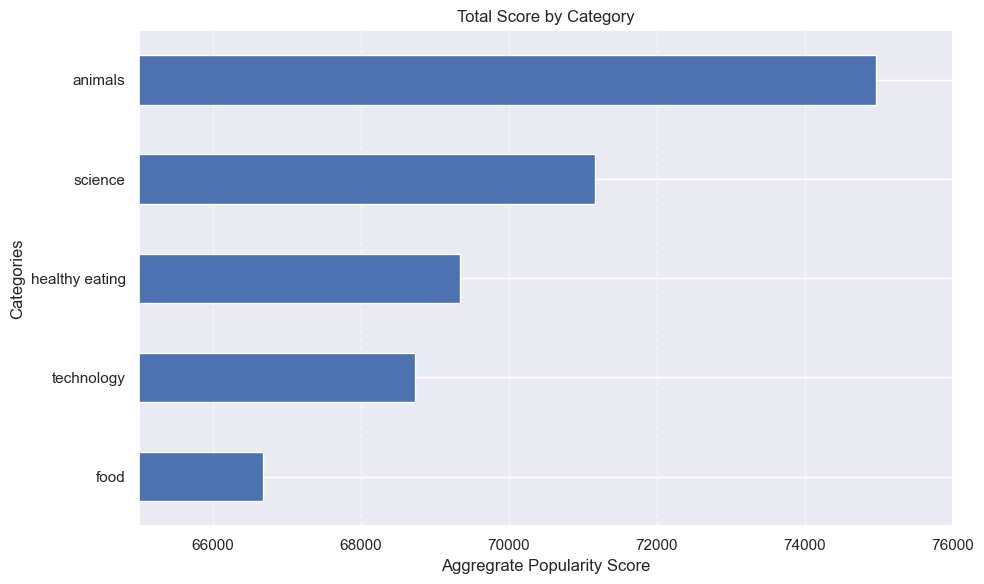

In [165]:
# Top 5 Popular Categories

category_scores = df.groupby('Category')['Score'].sum().sort_values(ascending=False).head(5)  # Get category sums and sort descending
category_scores = category_scores.sort_values(ascending=True)

# Create the bar plot
plt.figure(figsize=(10, 6))  # Adjust figure size as desired
category_scores.plot(kind='barh')  # Plot horizontal bars with a color

# Add labels and title
plt.xlabel('Aggregrate Popularity Score')
plt.ylabel('Categories')
plt.title('Total Score by Category')

plt.xlim(65000, 76000)
# Display the plot
plt.grid(axis='x', linestyle='--', alpha=0.6)  # Add grid lines for readability
plt.tight_layout()  # Adjust layout for better presentation
plt.show()

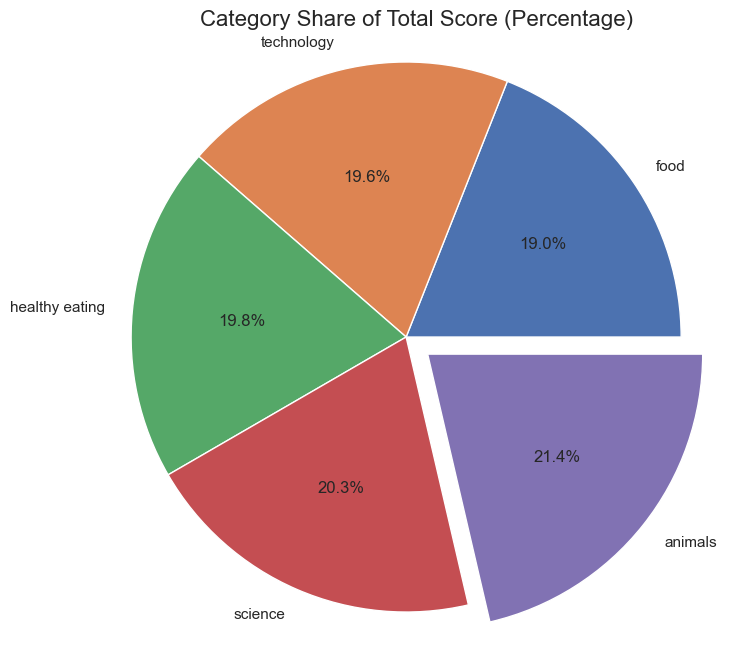

In [153]:
# Calculate percentages
total_score = category_scores.sum()
category_percentages = (category_scores / total_score) * 100

# Find the category with the highest percentage
max_percentage_category = category_percentages.idxmax()
explode = [0.1 if category == max_percentage_category else 0 for category in category_percentages.index]

# Create the pie chart with Matplotlib
plt.figure(figsize=(8, 8))

# Customize the pie chart
plt.pie(category_percentages, labels=category_percentages.index, autopct='%1.1f%%', explode=explode)

# Add title and improve layout
plt.title('Category Share of Total Score (Percentage)', fontsize=16)
plt.axis('equal')

# Display the plot
plt.show()


In [157]:
df.columns

Index(['Content ID', 'Type of Content', 'Category', 'Type of Reaction',
       'Datetime', 'Sentiment', 'Score'],
      dtype='object')

In [160]:
df[df.Category=='animals']['Type of Reaction'].count()

1897

In [161]:
df[df.Category=='animals']['Type of Reaction'].value_counts().head()

Type of Reaction
scared        132
peeking       129
hate          128
cherish       125
super love    123
Name: count, dtype: int64

Now lets move on to analyze the viral videos before jumping on to trendy videos

In [87]:
viral_content = df.pivot_table(values='Score', index='Content ID', aggfunc=sum).sort_values(ascending=False, by=['Score'])

C:\Users\taha_\AppData\Local\Temp\ipykernel_21272\3722007632.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  viral_content = df.pivot_table(values='Score', index='Content ID', aggfunc=sum).sort_values(ascending=False, by=['Score'])


In [88]:
top_popular_content = viral_content.merge(df[['Content ID', 'Category']], how='left', on='Content ID').drop_duplicates(subset=['Content ID'])
top_popular_content.head(6)

,Content ID,Score,Category
0,292051b5-b835-4a60-962a-bddf10da82bd,2273.0,technology
44,697af362-e84b-4429-b4ea-4123c6ab44ba,2231.0,science
92,4dd4da35-453e-466d-95ca-b1a7710fac1f,2223.0,technology
140,cd568dd1-70cf-45d6-b495-10eebff8c920,2222.0,dogs
188,31d142d9-4557-4613-bce5-cfe63cd0a3cf,2164.0,soccer
233,bac28166-5b8d-4f5d-88da-8c8f9a1c3f5b,2138.0,food


In [89]:
# For instance there are 59 videos belonging to animal category which have a score of over 500, 
# this indicate higher positive sentiment i.e. people enjoyed watching these videos

trending_content = top_popular_content[top_popular_content.Score > 500]['Category'].value_counts()
trending_content.head(6)

Category
animals           59
science           56
healthy eating    55
technology        52
cooking           51
travel            51
Name: count, dtype: int64

In [90]:
top_trending_content = trending_content.head(5)

In [91]:
top_trending_content

Category
animals           59
science           56
healthy eating    55
technology        52
cooking           51
Name: count, dtype: int64

In [92]:
top_trending_content

Category
animals           59
science           56
healthy eating    55
technology        52
cooking           51
Name: count, dtype: int64

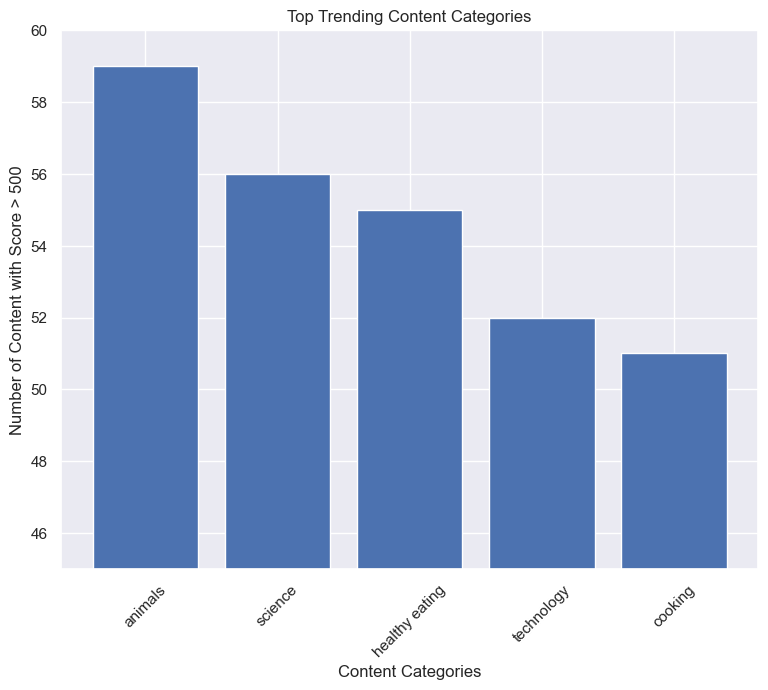

In [163]:
# Create bar plot
plt.figure(figsize=(9, 7))
plt.bar(top_trending_content.index, top_trending_content.values)

# Adding labels and title
plt.xlabel('Content Categories')
plt.ylabel('Number of Content with Score > 500')
plt.title('Top Trending Content Categories')

plt.ylim(45,60)

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.show()

In [94]:
# Back to viral content here, as we want to extract top 5 viral categories, there were two videos from Technology category
# We will consider the top one only

top_viral_content = top_popular_content.drop_duplicates(subset=['Category'])

In [95]:
# We now have viral content from each category, this can be used to analyze the type of content people like in each category

top_viral_content

,Content ID,Score,Category
0,292051b5-b835-4a60-962a-bddf10da82bd,2273.0,technology
44,697af362-e84b-4429-b4ea-4123c6ab44ba,2231.0,science
140,cd568dd1-70cf-45d6-b495-10eebff8c920,2222.0,dogs
188,31d142d9-4557-4613-bce5-cfe63cd0a3cf,2164.0,soccer
233,bac28166-5b8d-4f5d-88da-8c8f9a1c3f5b,2138.0,food
279,02ba5af1-784a-44cc-ae3a-14833c4a2237,2129.0,healthy eating
327,4bfc9824-aaeb-4695-8195-945686795b30,2122.0,public speaking
375,7f5299bf-ae57-4c01-a84c-f0c6bc7a5b5f,2105.0,animals
421,f08bdab2-b888-484e-8fd9-919e6ed86c12,2094.0,education
558,7c4f0389-01a5-4ea8-a643-83414441fe81,2055.0,tennis


In [96]:
top_5_viral_categories = top_viral_content.head(5).reset_index(drop=True)

In [97]:
top_5_viral_categories

,Content ID,Score,Category
0,292051b5-b835-4a60-962a-bddf10da82bd,2273.0,technology
1,697af362-e84b-4429-b4ea-4123c6ab44ba,2231.0,science
2,cd568dd1-70cf-45d6-b495-10eebff8c920,2222.0,dogs
3,31d142d9-4557-4613-bce5-cfe63cd0a3cf,2164.0,soccer
4,bac28166-5b8d-4f5d-88da-8c8f9a1c3f5b,2138.0,food


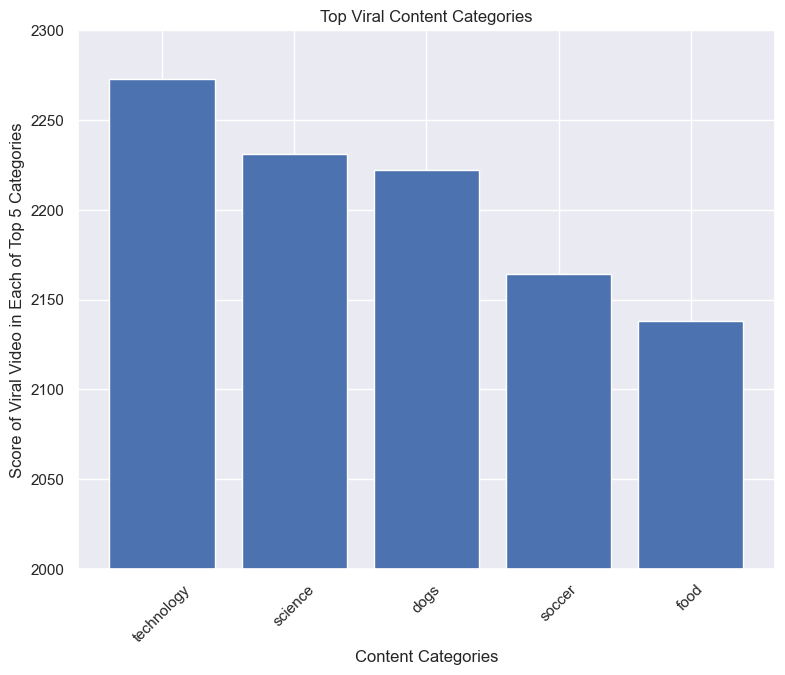

In [164]:
# Create bar plot
plt.figure(figsize=(9, 7))
plt.bar(top_5_viral_categories.Category, top_5_viral_categories.Score)

# Adding labels and title
plt.xlabel('Content Categories')
plt.ylabel('Score of Viral Video in Each of Top 5 Categories')
plt.title('Top Viral Content Categories')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

plt.ylim(2000,2300)

plt.show()

### Analyzing Number of Posts and User Engagement over the course of one year

This analysis will give the idea of growth, and if certain pattern is observed through the year in growth.
Then underlying factors could be studied for boost in engagement or number of posts.

In [99]:
df.Datetime.min()

Timestamp('2020-06-18 08:07:22')

In [100]:
df.Datetime.max()

Timestamp('2021-06-18 08:30:29')

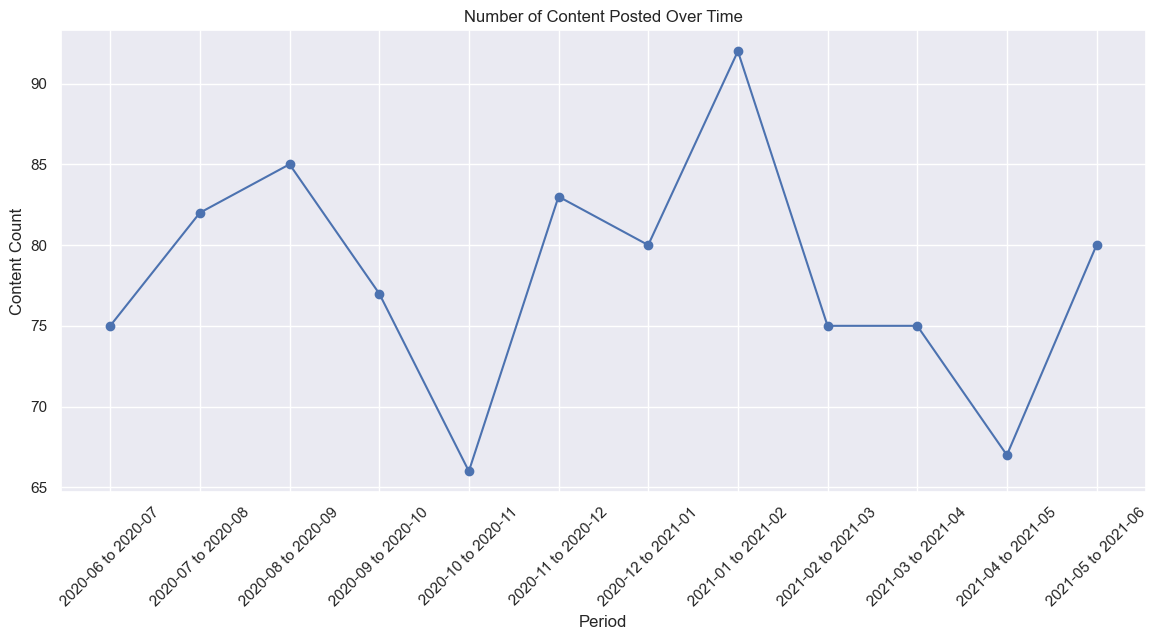

In [101]:
sns.set()

# Drop duplicate content IDs
df_unique_content = df.drop_duplicates(subset='Content ID')

# Create a new DataFrame to store the counts for each period
period_counts = pd.DataFrame(columns=['Period', 'Content Count'])

# Calculate the total number of months between the minimum and maximum dates
total_months = (df_unique_content['Datetime'].max().to_period('M') - df_unique_content['Datetime'].min().to_period('M')).n

# Loop through each month and count the number of content postings
for i in range(total_months):
    # Define the start and end dates of the current period
    start_date = df_unique_content['Datetime'].min() + pd.DateOffset(months=i)
    end_date = start_date + pd.DateOffset(months=1) - pd.Timedelta(days=1)
    
    # Count the number of content postings during the current period
    content_count = df_unique_content[(df_unique_content['Datetime'] >= start_date) & (df_unique_content['Datetime'] <= end_date)]['Content ID'].nunique()
    
    # Add the period and content count to the period_counts DataFrame
    period_counts = pd.concat([period_counts, pd.DataFrame({'Period': [f'{start_date.strftime("%Y-%m")} to {end_date.strftime("%Y-%m")}'], 
                                                            'Content Count': [content_count]})], ignore_index=True)

# Plot the line graph
plt.figure(figsize=(14, 6))
plt.plot(period_counts['Period'], period_counts['Content Count'], marker='o')
plt.title('Number of Content Posted Over Time')
plt.xlabel('Period')
plt.ylabel('Content Count')
plt.xticks(rotation=45)
plt.show()

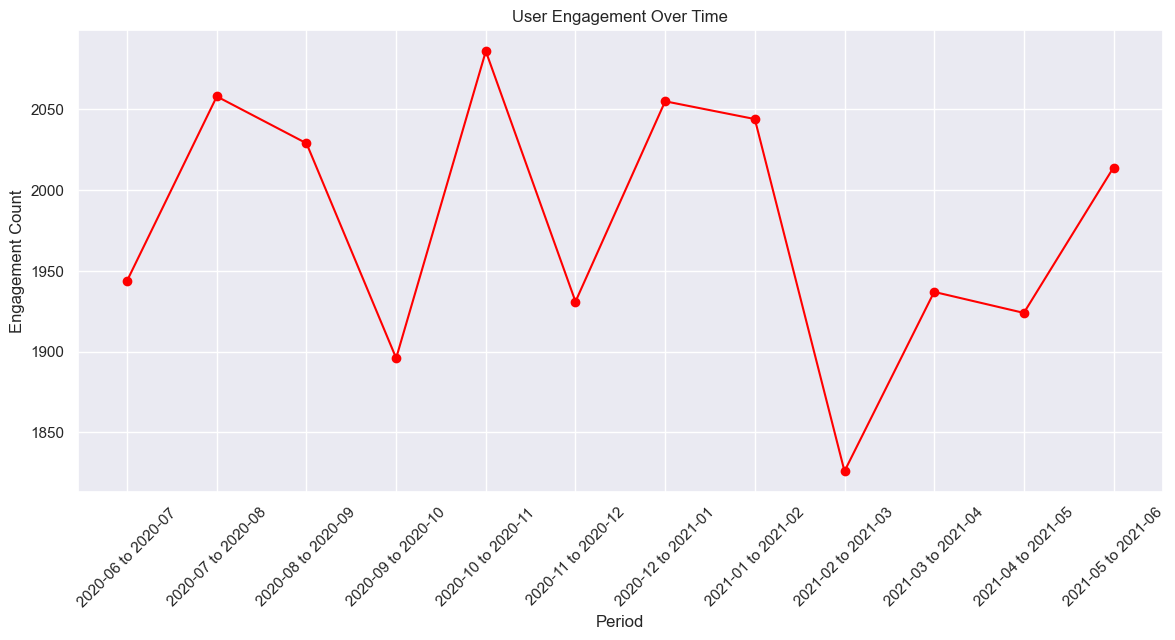

In [102]:
sns.set()

# Create a new DataFrame to store the counts for each period
period_engagement = pd.DataFrame(columns=['Period', 'Engagement Count'])

# Calculate the total number of months between the minimum and maximum dates
total_months = (df['Datetime'].max().to_period('M') - df['Datetime'].min().to_period('M')).n

# Loop through each month and count the number of engagements
for i in range(total_months):
    # Define the start and end dates of the current period
    start_date = df['Datetime'].min() + pd.DateOffset(months=i)
    end_date = start_date + pd.DateOffset(months=1) - pd.Timedelta(days=1)
    
    # Count the number of engagements during the current period
    engagement_count = df[(df['Datetime'] >= start_date) & (df['Datetime'] <= end_date)].shape[0]
    
    # Add the period and engagement count to the period_engagement DataFrame
    period_engagement = pd.concat([period_engagement, pd.DataFrame({'Period': [f'{start_date.strftime("%Y-%m")} to {end_date.strftime("%Y-%m")}'], 
                                                                    'Engagement Count': [engagement_count]})], ignore_index=True)

# Plot the line graph
plt.figure(figsize=(14, 6))
plt.plot(period_engagement['Period'], period_engagement['Engagement Count'], marker='o', color='red')
plt.title('User Engagement Over Time')
plt.xlabel('Period')
plt.ylabel('Engagement Count')
plt.xticks(rotation=45)
plt.show()


C:\Users\taha_\AppData\Local\Temp\ipykernel_21272\48236895.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(period_counts['Period'], rotation=45)


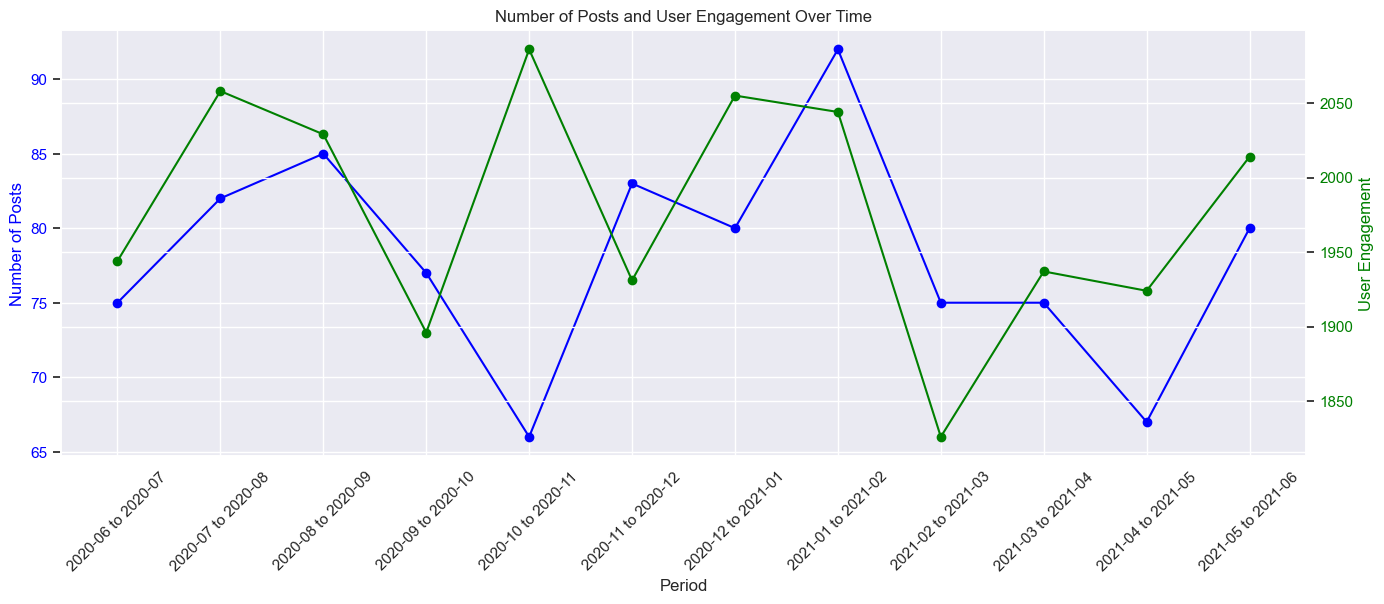

In [103]:
# Drop duplicate content IDs for counting unique content posts
df_unique_content = df.drop_duplicates(subset='Content ID')

# Create a new DataFrame to store the counts for each period
period_counts = pd.DataFrame(columns=['Period', 'Content Count'])

# Calculate the total number of months between the minimum and maximum dates for content count
total_months_content = (df_unique_content['Datetime'].max().to_period('M') - df_unique_content['Datetime'].min().to_period('M')).n

# Loop through each month and count the number of content postings
for i in range(total_months_content):
    # Define the start and end dates of the current period
    start_date = df_unique_content['Datetime'].min() + pd.DateOffset(months=i)
    end_date = start_date + pd.DateOffset(months=1) - pd.Timedelta(days=1)
    
    # Count the number of content postings during the current period
    content_count = df_unique_content[(df_unique_content['Datetime'] >= start_date) & (df_unique_content['Datetime'] <= end_date)]['Content ID'].nunique()
    
    # Add the period and content count to the period_counts DataFrame
    period_counts = pd.concat([period_counts, pd.DataFrame({'Period': [f'{start_date.strftime("%Y-%m")} to {end_date.strftime("%Y-%m")}'], 
                                                            'Content Count': [content_count]})], ignore_index=True)

# Create a new DataFrame to store the counts for each period for user engagement
period_engagement = pd.DataFrame(columns=['Period', 'Engagement Count'])

# Calculate the total number of months between the minimum and maximum dates for engagement count
total_months_engagement = (df['Datetime'].max().to_period('M') - df['Datetime'].min().to_period('M')).n

# Loop through each month and count the number of engagements
for i in range(total_months_engagement):
    # Define the start and end dates of the current period
    start_date = df['Datetime'].min() + pd.DateOffset(months=i)
    end_date = start_date + pd.DateOffset(months=1) - pd.Timedelta(days=1)
    
    # Count the number of engagements during the current period
    engagement_count = df[(df['Datetime'] >= start_date) & (df['Datetime'] <= end_date)].shape[0]
    
    # Add the period and engagement count to the period_engagement DataFrame
    period_engagement = pd.concat([period_engagement, pd.DataFrame({'Period': [f'{start_date.strftime("%Y-%m")} to {end_date.strftime("%Y-%m")}'], 
                                                                    'Engagement Count': [engagement_count]})], ignore_index=True)

# Plot both on the same graph
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot number of posts
ax1.plot(period_counts['Period'], period_counts['Content Count'], marker='o', color='blue', label='Number of Posts Over Time')
ax1.set_xlabel('Period')
ax1.set_ylabel('Number of Posts', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create secondary y-axis for user engagement count
ax2 = ax1.twinx()
ax2.plot(period_engagement['Period'], period_engagement['Engagement Count'], marker='o', color='green', label='User Engagement Over Time')
ax2.set_ylabel('User Engagement', color='green')
ax2.tick_params(axis='y', labelcolor='green')


# Rotate x-axis labels
ax1.set_xticklabels(period_counts['Period'], rotation=45)

fig.tight_layout()
plt.title('Number of Posts and User Engagement Over Time')
plt.show()


### Word Count of Reactions on different categories of videos

This analysis will give us idea of which type of content user like the most. 
Based on that tailored reccomendations could be made for newcomers and general audience.

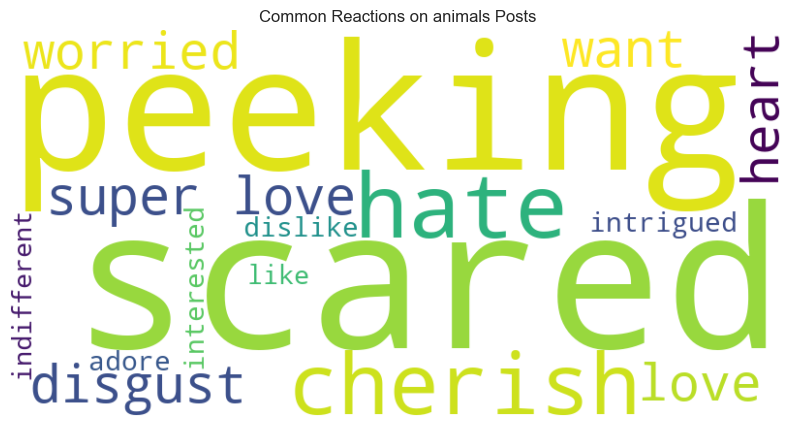

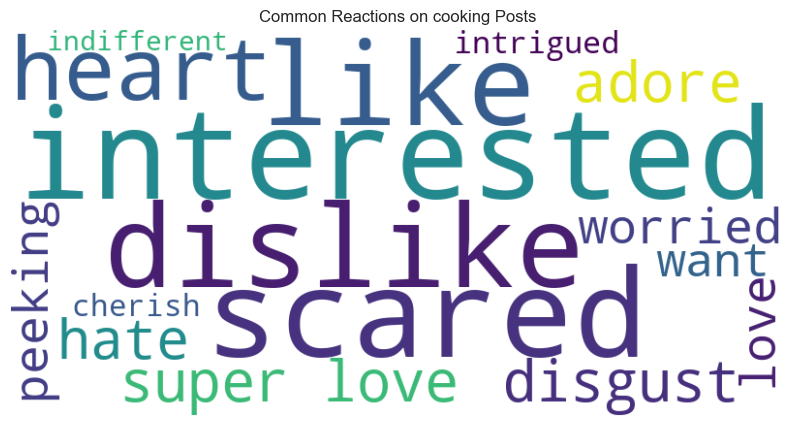

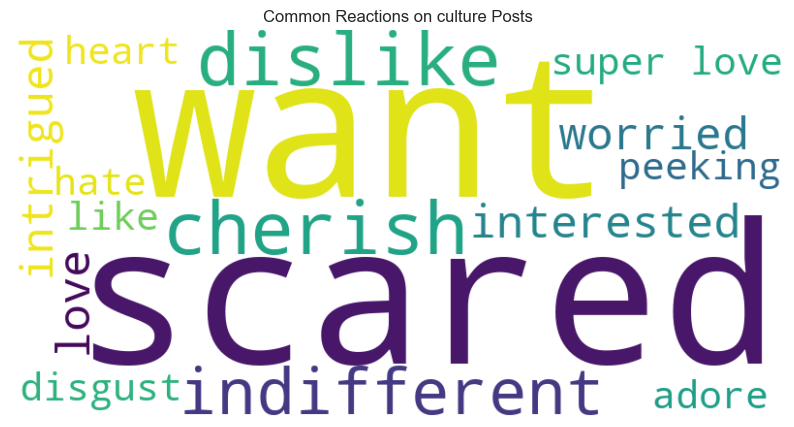

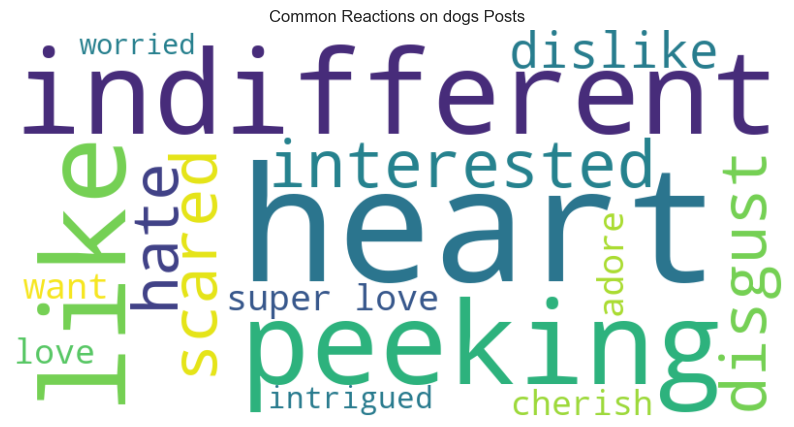

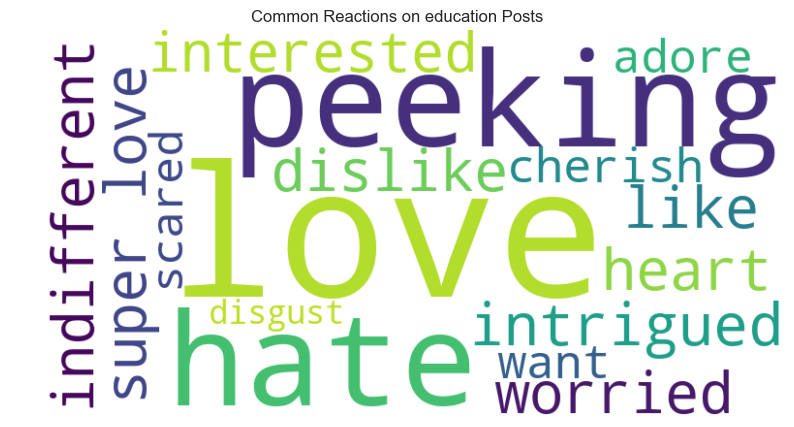

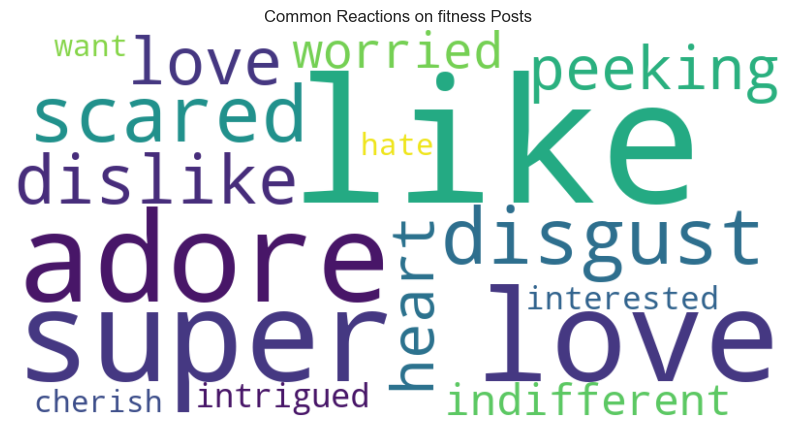

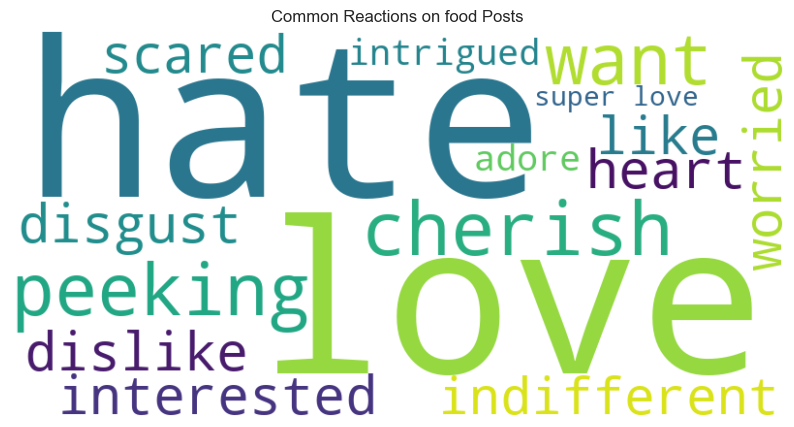

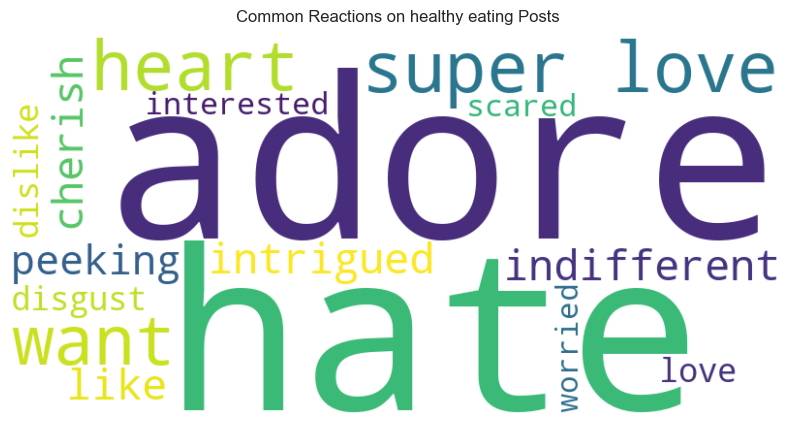

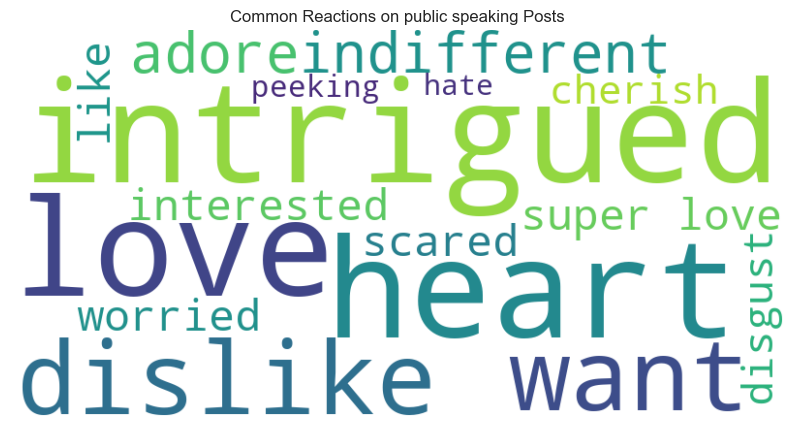

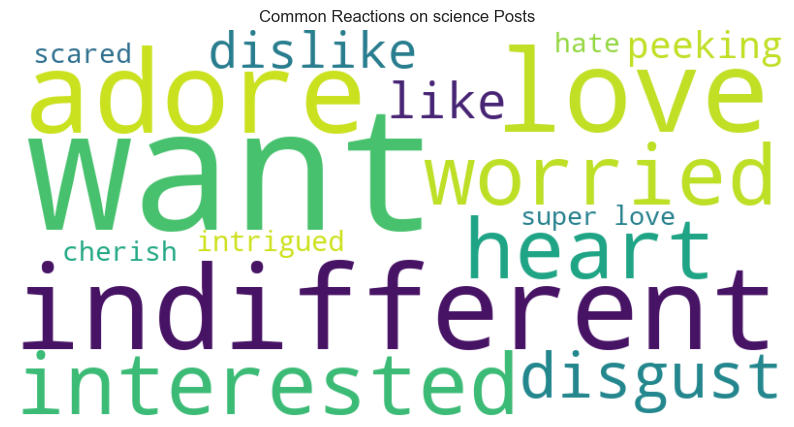

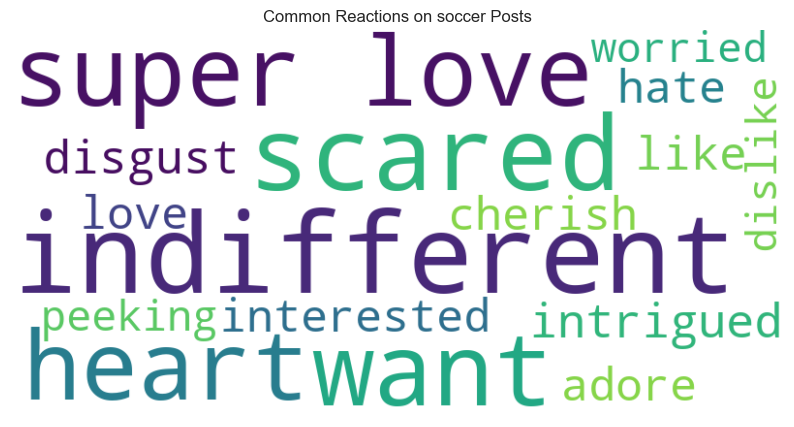

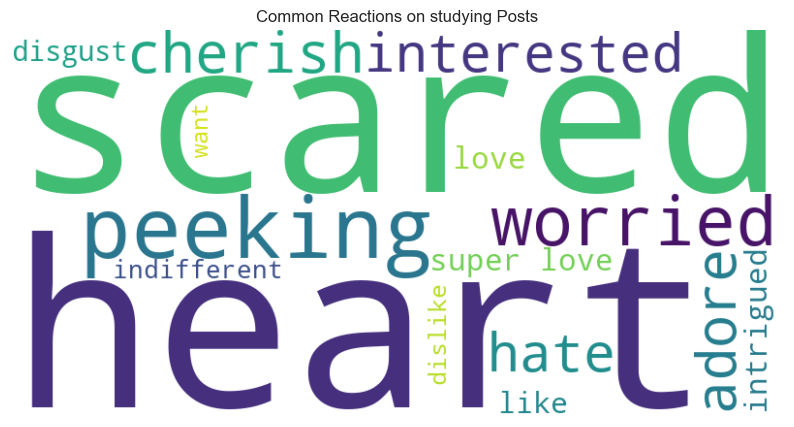

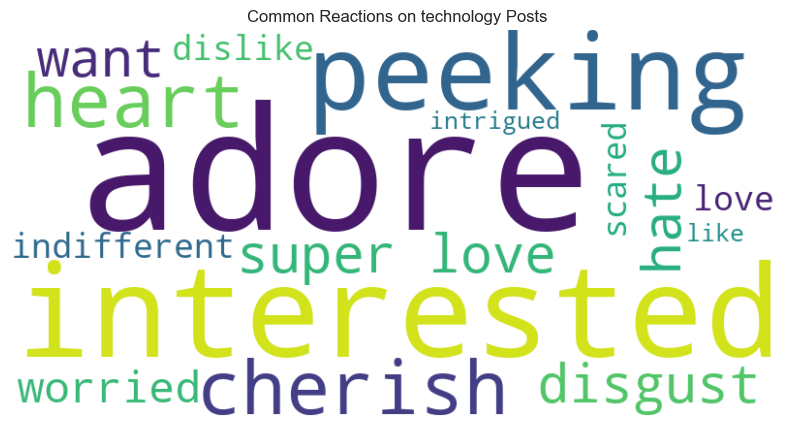

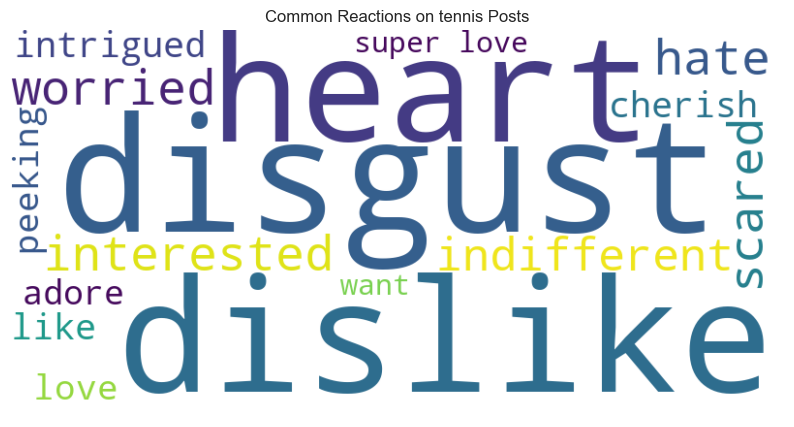

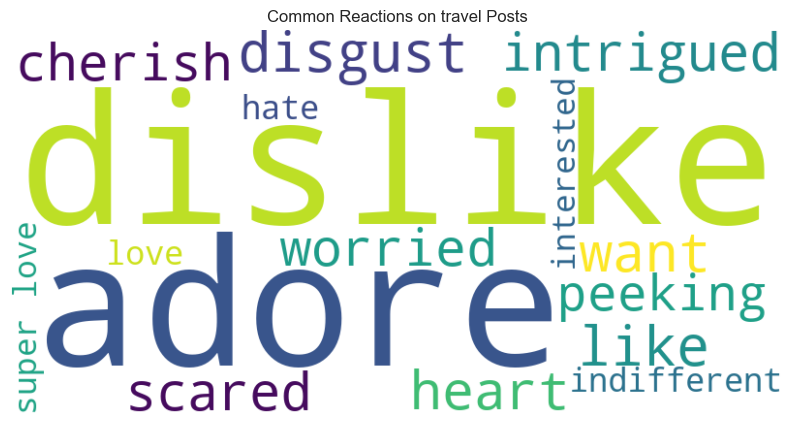

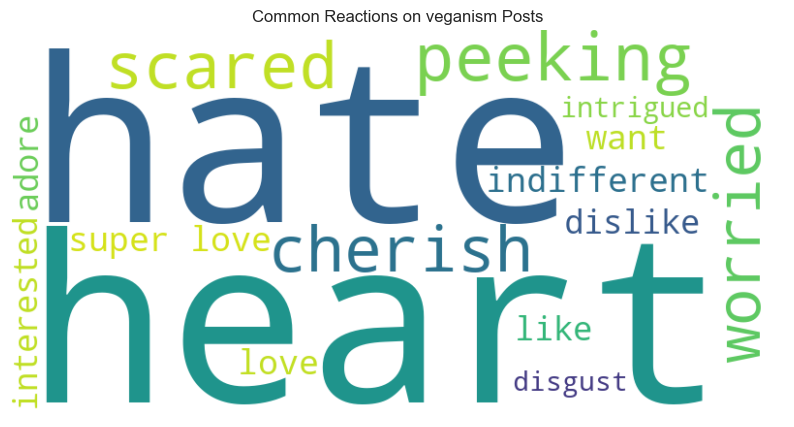

In [104]:
# Group the DataFrame by 'Category' and 'Type of Reaction', and count the occurrences
word_count = df.groupby(['Category', 'Type of Reaction']).size().reset_index(name='Count')

# Convert the grouped DataFrame to a dictionary
word_count_dict = {}
for index, row in word_count.iterrows():
    category = row['Category']
    reaction = row['Type of Reaction']
    count = row['Count']
    if category not in word_count_dict:
        word_count_dict[category] = {}
    word_count_dict[category][reaction] = count

# Create the WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud for each category
for category, reaction_counts in word_count_dict.items():
    wordcloud.generate_from_frequencies(reaction_counts)
    
    # Plot the word cloud for the current category
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Common Reactions on {category} Posts')
    plt.axis('off')
    plt.show()


The final conclusions and insights from the notebook are shared in the presentation submitted.

In [105]:
df.Category.value_counts()

Category
animals            1897
science            1796
healthy eating     1717
food               1699
technology         1698
culture            1676
cooking            1664
travel             1647
soccer             1457
education          1433
fitness            1395
studying           1363
dogs               1338
tennis             1328
veganism           1248
public speaking    1217
Name: count, dtype: int64

In [109]:
df.Score

0         0.0
1        10.0
2        15.0
3         0.0
4        30.0
         ... 
24606    10.0
24607    45.0
24608    30.0
24609    12.0
24610    70.0
Name: Score, Length: 24573, dtype: float64

In [114]:
df.groupby('Category')['Score'].sum().sort_values(ascending=False)

Category
animals            74965.0
science            71168.0
healthy eating     69339.0
technology         68738.0
food               66676.0
culture            66579.0
travel             64880.0
cooking            64756.0
soccer             57783.0
education          57436.0
fitness            55323.0
studying           54269.0
dogs               52511.0
tennis             50339.0
veganism           49619.0
public speaking    49264.0
Name: Score, dtype: float64

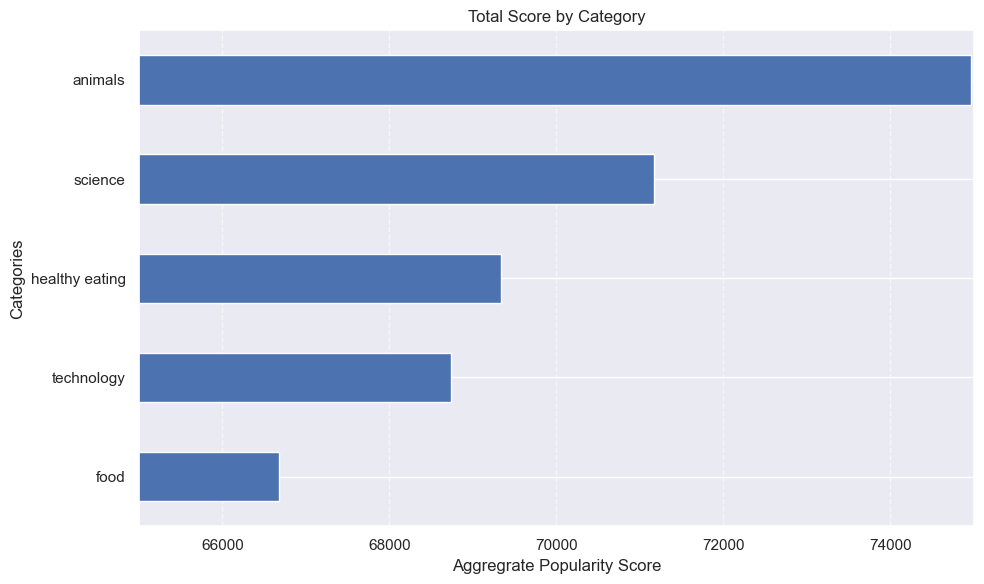

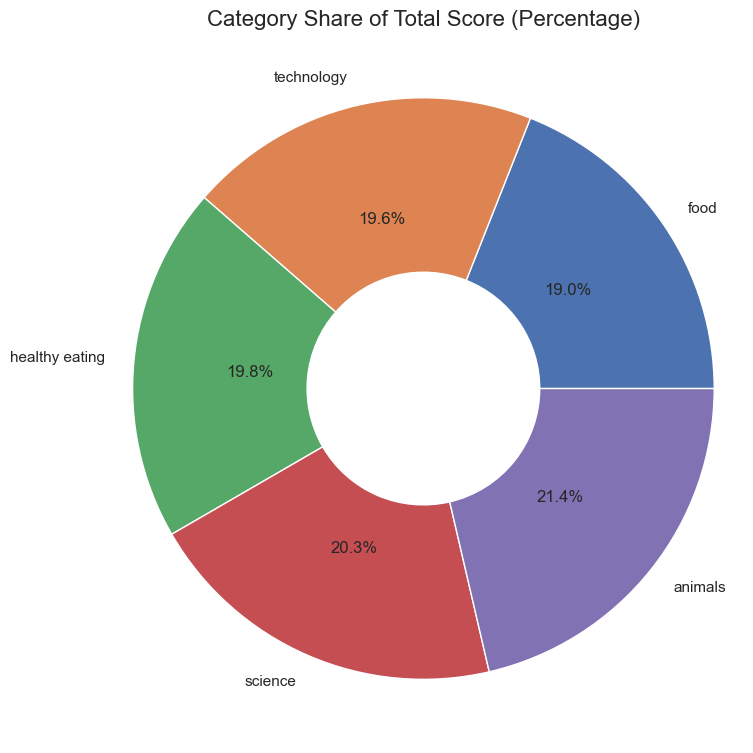